In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing important files....
import io
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.svm import SVC
from google.colab import files
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from xgboost import XGBRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from statistics import mean, stdev
from sklearn import tree
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
import tensorflow as
from sklearn.metrics import classification_report
from sklearn.feature_selection import Stf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import cohen_kappa_scoreelectKBest
from sklearn.feature_selection import chi2


In [ ]:

#df = pd.read_excel('/content/drive/MyDrive/Parkinson all docs/Dataset/combine dataset(train).xlsx')
#df_test=pd.read_excel('/content/drive/MyDrive/Parkinson all docs/Dataset/combine dataset(test).xlsx')
df = pd.read_excel('/content/drive/MyDrive/Parkinson all docs/Dataset/combine dataset.xlsx')

In [ ]:
df

,PAT_NO,Event_ID,NP1SLPN,NP1SLPD,NP1PAIN,NP1URIN,NP1CNST,NP1LTHD,NP1FATG,NP2SPCH,...,NP3PTRML,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,Status
0,3000,BL,1.0,2.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,3000,V04,0.0,2.0,0.0,1.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3000,V06,2.0,1.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3000,V08,3.0,2.0,0.0,1.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,3000,V10,1.0,1.0,1.0,1.0,1,0,1,0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141,4136,V07,2.0,2.0,2.0,0.0,0,0,2,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7142,4136,V09,4.0,2.0,3.0,1.0,1,1,3,3,...,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,3.0,1
7143,4139,BL,0.0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7144,4139,V04,0.0,0.0,1.0,0.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
#Defining features(X) and labels(Y)....
#X_train = df.drop(['Status','PAT_NO','Event_ID'],axis =1).values
#y_train = df['Status'].values
#X_test = df_test.drop(['Status','PAT_NO','Event_ID'],axis =1).values
#y_test = df_test['Status'].values
#Defining features(X) and labels(Y)....
X = df.drop(['Status','PAT_NO','Event_ID'],axis =1).values
y = df['Status'].values


In [ ]:
#Checking is any nan value available or not
np.any(np.isnan(X))

True

In [ ]:
#Missing value handle
imputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
#imputer1 = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
##imputer1 = imputer1.fit(X_test)
#X_test = imputer1.transform(X_test)
feature_X = pd.DataFrame(X)
#feature_X_test = pd.DataFrame(X_test)

In [ ]:
#Checking is any nan value available or not
np.any(np.isnan(y))

False

In [ ]:
# variable declaration
components= 25
# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = components )
X_kbest_features = chi2_features.fit_transform(X,y)


In [ ]:

X_kbest_features = pd.DataFrame(X_kbest_features)


In [ ]:
# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 53
Reduced feature number: 25


In [ ]:
X_modified_scaled = StandardScaler().fit_transform(X_kbest_features)

In [ ]:


#Definimng model
from sklearn.tree import DecisionTreeClassifier
#Definimng model
model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


training time: 15.216 s
fpr: [array([0.        , 0.05952381, 1.        ]), array([0.        , 0.05952381, 1.        ]), array([0.        , 0.04761905, 1.        ]), array([0.        , 0.03571429, 1.        ]), array([0.        , 0.03571429, 1.        ]), array([0.        , 0.04761905, 1.        ]), array([0.        , 0.02380952, 1.        ]), array([0.        , 0.03571429, 1.        ]), array([0.        , 0.03571429, 1.        ]), array([0.        , 0.04761905, 1.        ]), array([0.        , 0.07142857, 1.        ]), array([0.        , 0.04761905, 1.        ]), array([0.        , 0.05952381, 1.        ]), array([0.        , 0.04761905, 1.        ]), array([0.        , 0.07228916, 1.        ])]
tpr: [array([0.        , 0.98727735, 1.        ]), array([0.        , 0.97455471, 1.        ]), array([0.        , 0.98473282, 1.        ]), array([0.        , 0.97455471, 1.        ]), array([0.        , 0.97964377, 1.        ]), array([0.        , 0.99236641, 1.        ]), array([0.        , 

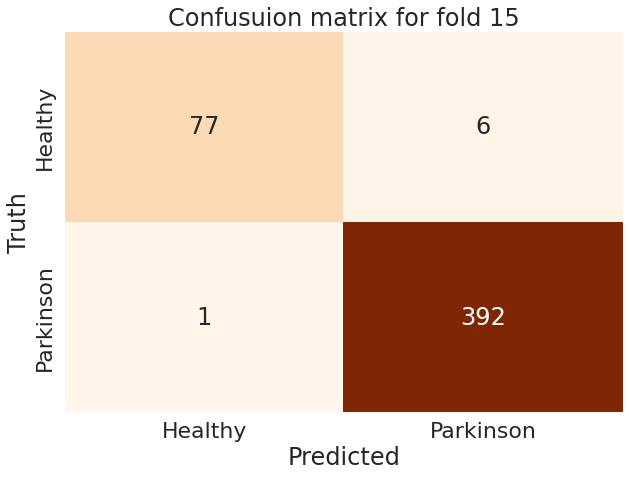

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve

split=15
model_name= "KNN"
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=split, shuffle=True, random_state=1)
lst_accu_stratified = []
lst_precision_stratified = []
lst_recall_stratified = []
lst_f1_stratified = []
lst_roc_stratified = []
lst_kappa_stratified = []
lst_accu_train_stratified=[]
lst_mse_stratified=[]
lst_mae_stratified=[]
lst_rmse_stratified=[]
lst_pred_time_stratified=[]
lst_specificity_stratified = []

lr_fpr=[]
lr_tpr=[]
fold=1
import time
t0=time.time()
for train_index, test_index in skf.split(X_modified_scaled, y):
    x_train_fold, x_test_fold = X_modified_scaled[train_index], X_modified_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))
    lst_accu_train_stratified.append(model.score(x_train_fold,y_train_fold))


    t1=time.time()
    y_pred = model.predict(x_test_fold)
    lst_pred_time_stratified.append(round((time.time()-t1), 5))
    tn, fp, fn, tp = confusion_matrix(y_test_fold, y_pred).ravel()
    specificity = tn / (tn+fp)
    lst_specificity_stratified.append(specificity)

    # precision tp / (tp + fp)
    lst_precision_stratified.append(precision_score(y_test_fold, y_pred))
    # recall: tp / (tp + fn)
    lst_recall_stratified.append(recall_score(y_test_fold, y_pred))
    # f1: 2 tp / (2 tp + fp + fn)
    lst_f1_stratified.append(f1_score(y_test_fold, y_pred))
    # ROC AUC
    lst_roc_stratified.append(roc_auc_score(y_test_fold, y_pred))
    #Cohen's kappa
    lst_kappa_stratified.append(cohen_kappa_score(y_test_fold, y_pred))
    lst_mse_stratified.append(metrics.mean_squared_error(y_test_fold, y_pred))
    lst_mae_stratified.append(metrics.mean_absolute_error(y_test_fold, y_pred))
    lst_rmse_stratified.append(np.sqrt(metrics.mean_squared_error(y_test_fold, y_pred)))
    lr_fp, lr_tp, _ = roc_curve(y_test_fold,  y_pred)
    lr_fpr.append(lr_fp)
    lr_tpr.append(lr_tp)




    cm = confusion_matrix(y_test_fold, y_pred)
    %matplotlib inline
    plt.figure(figsize=(10,7))
    sns.set(font_scale = 2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False, xticklabels=['Healthy', 'Parkinson'], yticklabels=['Healthy', 'Parkinson'])
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title("Confusuion matrix for fold "+str(fold))
    # show the plot
    plt.savefig(model_name+'_CHI_S_CM_components_'+ str(components)+'_split_no_'+ str(split)+'_fold_no_'+str(fold)+'.png')
    fold=fold+1








print ("training time:", round(time.time()-t0, 3), "s") # the time would be round to 3 decimal in seconds
t1=time.time()
# Print the output.
print('fpr:',lr_fpr)
print('tpr:', lr_tpr)
print("")
print("")

print('List of possible train accuracy:',lst_accu_train_stratified)
print('\nOverall train Accuracy:',
     mean(lst_accu_train_stratified)*100, '%')
print('\nStandard Deviation for train accuraccy is:', stdev(lst_accu_train_stratified))
print("")
print("")

print('List of possible test accuracy:', lst_accu_stratified)
print('\nOverall test Accuracy:',
     mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation for test accuraccy is:', stdev(lst_accu_stratified))
print("")
print("")

print('List of possible prediction time:', lst_pred_time_stratified)
print('\nOverall prdiction time:',
     mean(lst_pred_time_stratified))
print('\nStandard Deviation for prediction time is:', stdev(lst_pred_time_stratified, 3))
print("")
print("")

print('List of possible mse:', lst_mse_stratified)
print('\nOverall mse:',
     mean(lst_mse_stratified))
print('\nStandard Deviation for mse is:', stdev(lst_mse_stratified))
print("")
print("")

print('List of possible mae:', lst_mae_stratified)
print('\nOverall mae:',
     mean(lst_mae_stratified))
print('\nStandard Deviation for mae is:', stdev(lst_mae_stratified))
print("")
print("")

print('List of possible rmse:', lst_rmse_stratified)
print('\nOverall rmse:',
     mean(lst_rmse_stratified))
print('\nStandard Deviation for rmse is:', stdev(lst_rmse_stratified))
print("")
print("")


print('List of possible precision:', lst_precision_stratified)
print('\nOverall Precision:',
     mean(lst_precision_stratified)*100, '%')
print('\nStandard Deviation for precisaion is:', stdev(lst_precision_stratified))
print("")
print("")



print('List of possible recall:', lst_recall_stratified)
print('\nOverall Recall:',
     mean(lst_recall_stratified)*100, '%')
print('\nStandard Deviation for recall is:', stdev(lst_recall_stratified))
print("")
print("")

print('List of possible specificity:', lst_specificity_stratified)
print('\nOverall specificity:',
     mean(lst_specificity_stratified)*100, '%')
print('\nStandard Deviation for specificity is:', stdev(lst_specificity_stratified))
print("")
print("")

print('List of possible f1_score:', lst_f1_stratified)
print('\nOverall F1-score:',
     mean(lst_f1_stratified)*100, '%')
print('\nStandard Deviation for f1-score is:', stdev(lst_f1_stratified))
print("")
print("")

print('List of possible roc:', lst_roc_stratified)
print('\nOverall roc-auc:',
     mean(lst_roc_stratified))
print('\nStandard Deviation for roc is:', stdev(lst_roc_stratified))
print("")
print("")

print('List of possible kappa:', lst_kappa_stratified)
print('\nOverall kappa:',
     mean(lst_kappa_stratified))
print('\nStandard Deviation for kappa is:', stdev(lst_kappa_stratified))
print("")
print("")

















































In [ ]:
import pickle
pickle.dump(model, open("model_"+model_name+"_CHI_S_components_"+str(components)+"_split_no_"+str(split)+".pkl", "wb"))

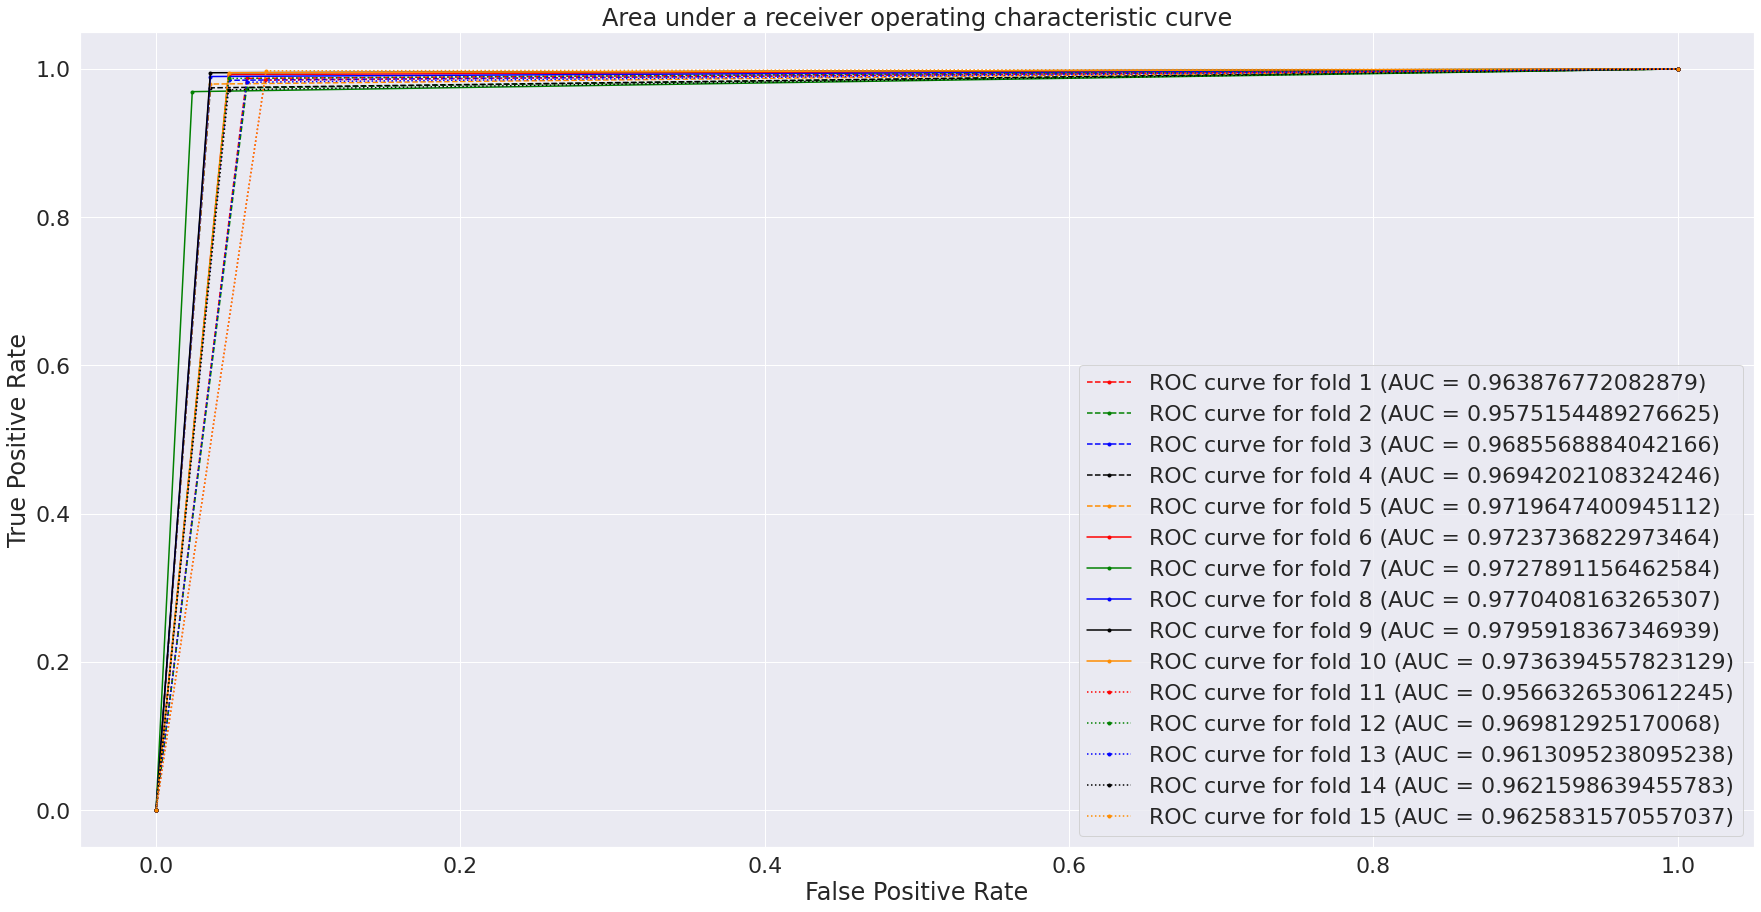

In [ ]:
# plot the roc curve for the model
from matplotlib import pyplot
from sklearn.metrics import roc_curve
plt.figure(figsize=(30,15))
# calculate roc curves
color=['red','green','blue','black','darkorange']

# plot the roc curve for the model
for i in range(split):
  if split<10:
    if i<5:
     pyplot.plot(lr_fpr[i], lr_tpr[i], marker='.',linestyle='--', color=str(color[i]), label="ROC curve for fold "+str(i+1)+" (AUC = "+ str(lst_roc_stratified[i]) + ")")
    else:
      pyplot.plot(lr_fpr[i], lr_tpr[i], marker='.', color=str(color[i-5]), label="ROC curve for fold "+str(i+1)+" (AUC = "+ str(lst_roc_stratified[i]) + ")")

  else:
    if i<5:
      pyplot.plot(lr_fpr[i], lr_tpr[i], marker='.',linestyle='--', color=str(color[i]), label="ROC curve for fold "+str(i+1)+" (AUC = "+ str(lst_roc_stratified[i]) + ")")

    elif i>=5 and i<10:
      pyplot.plot(lr_fpr[i], lr_tpr[i], marker='.', color=str(color[i-5]), label="ROC curve for fold "+str(i+1)+" (AUC = "+ str(lst_roc_stratified[i]) + ")")
    else:
      pyplot.plot(lr_fpr[i], lr_tpr[i], marker='.',linestyle='dotted', color=str(color[i-10]), label="ROC curve for fold "+str(i+1)+" (AUC = "+ str(lst_roc_stratified[i]) + ")")


# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
plt.title("Area under a receiver operating characteristic curve")

# show the plot
plt.savefig(model_name +'_CHI_S_auc_components_'+ str(components)+'_split_no_'+str(split)+'.png')